Данная лабораторная работа ориентирована на знакомство с вероятностными подходами для моделей машинного обучения на примере реализации наивных байесовских классификаторов на языке программирования Python:

Для пользовательских и/или модельных данных реализовать Гауссовский наивный байесовский классификатор.
Для несбалансированных пользовательских и/или модельных данных реализовать дополненный наивный байесовский классификатор.
Для пользовательских и/или модельных данных реализовать мультиномиальный наивный байесовский классификатор.
Для пользовательских и/или модельных данных реализовать наивный байесовский классификатор Бернулли.

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Для Гауссовского наивного байесовского классификатора взял датасет Ирисы Фишера, поскольку предполагал, что
#физические характеристики   растений(например, Ширина наружной доли околоцветника) имеют нормальное распределение
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.96


In [45]:
import pandas as pd
X=pd.DataFrame(X)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
#Построим распределения признаков, чтобы убедиться, что признаки распределены номрально
X=X.to_numpy()
first=X[:, 0]
second=X[:, 1]
third=X[:, 2]
fourth=X[:, 3]

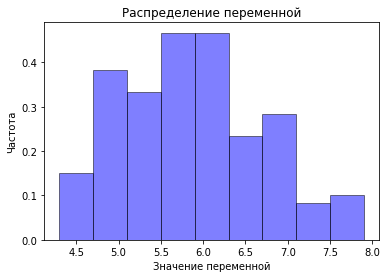

In [47]:
import matplotlib.pyplot as plt
plt.hist(first, bins=9, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

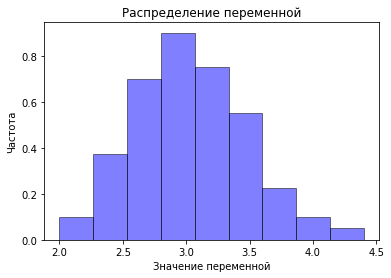

In [48]:
plt.hist(second, bins=9, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

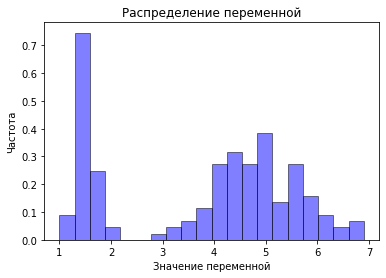

In [51]:
plt.hist(third, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

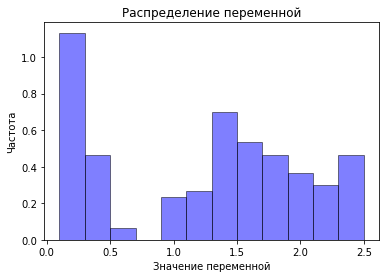

In [55]:
plt.hist(fourth, bins=12, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

In [43]:
#У последних двух фичей присутствует еще один колокол, что неудивительно, ведь в датасете разные классы, и у разных растений
#могут быть разные характеристики
X=X[:, 0:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7


In [38]:
from random import random #генерирует псевдослучайное число от 0 до 1
#Для мультиномиального классификатора было сложно найти реальный датасет, в котором бы признаки были частотами, поэтому 
#я решил смоделировать бросание двух монет: первая монета - правильная(отмечена классом 1, вероятность выпадения 
#нуля и единицы равны 0,5), вторая - неправильная(класс - 0, вероятность выпадения нуля равна 0,6). В каждом испытании проводится
# c бросков. Таким образом, у объекта два признака - количество выпавших нулей и количество выпавших единиц. 
#Задача - определить какой из двух монет(генераторов) производили подбрасывание.
#Функция для генерации выборки 
def generate_X_y(a, b, c) : #a-количество испытаний для правильного генератора, b-для неправильного, c-количество бросков в одном  испытании
    X=[]
    y=[]
    for i in range(a) :
        zeros=0
        ones=0
        for j in range(c) :
            if random()>=0.5 :
                ones+=1
            else :
                zeros+=1
        X.append([zeros, ones])
        y.append(1)
    for i in range(b) :
        zeros=0
        ones=0
        for j in range(c) :
            if random()>=0.6 :
                ones+=1
            else :
                zeros+=1
        X.append([zeros, ones])
        y.append(0)
    X=pd.DataFrame(X)
    y=pd.DataFrame(y)
    return X, y

In [39]:
#Пример выборки. У первого объекта датасета 10 раз выпала единица и 10 раз выпал ноль.
X, y=generate_X_y(500, 500, 20)
X.head()

,0,1
0,10,10
1,13,7
2,8,12
3,9,11
4,8,12


In [40]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [57]:
import numpy as np
#Для сравнения также написал "эталонный" классификатор - классификатор, который считает процент выпавших нулей у объекта
#И в случае, если он выше 0,55 предсказывает класс 0, в противном случае - класс 1.
def etalon(X) :
    predicted=[]
    X=X.to_numpy()
    for x in X :
        if x[0]/(x[0]+x[1])>=0.55 :
            predicted.append(0)
        else :
            predicted.append(1)
    return predicted
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
number_of_trials=[10, 20, 100, 300, 600]
for c in number_of_trials :
    X, y=generate_X_y(500, 500, c)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    print(f'accuracy={accuracy_score(y_test, clf.predict(X_test)):.3f}  эталонная точность={accuracy_score(y_test, etalon(X_test)):.3f}   количество бросков в одном испытании={c}')

C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y 

accuracy=0.603  эталонная точность=0.603   количество бросков в одном испытании=10
accuracy=0.673  эталонная точность=0.663   количество бросков в одном испытании=20
accuracy=0.830  эталонная точность=0.823   количество бросков в одном испытании=100
accuracy=0.967  эталонная точность=0.967   количество бросков в одном испытании=300
accuracy=0.997  эталонная точность=0.997   количество бросков в одном испытании=600


In [ ]:
#Из предыдущей ячейки видно, что при увеличении количества бросков в одном испытании точность классификатора растет.
#Этот результат совпадает с интуицией: при увеличении количества бросков в данных должно становится меньше шума, а следовательно 
#точность должна расти. Кроме того сравнения с эталонным классификатором указывают на то, что мультиномиальный классификатор
#"выжимает" максимум точности из имеющейся выборки, а низкое значение точности при 10, 20 бросках объясняется их малым количесвом
#а не плохой работой классификатора.

In [58]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import ComplementNB
number_of_trials=[10, 20, 100, 300, 600]
for c in number_of_trials :
    #Для дополненного классификатора сделаем выборку несбалансированной: 200 объектов 1-го класса и 800 объектов 2-го класса
    X, y=generate_X_y(200, 800, c)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    clf = ComplementNB()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    y_etalon=etalon(X_test)
    print(f' количество бросков в одном испытании={c}  precision={precision_score(y_test, y_pred):.3f} recall={recall_score(y_test, y_pred):.3f} F-мера={f1_score(y_test, y_pred):.3f}')
    print(f'                           для эталона :   precision={precision_score(y_test, y_etalon):.3f} recall={recall_score(y_test, y_etalon):.3f} F-мера={f1_score(y_test, y_etalon):.3f}')
    print()

C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y 

 количество бросков в одном испытании=10  precision=0.301 recall=0.683 F-мера=0.418
                           для эталона :   precision=0.301 recall=0.683 F-мера=0.418

 количество бросков в одном испытании=20  precision=0.298 recall=0.750 F-мера=0.427
                           для эталона :   precision=0.350 recall=0.600 F-мера=0.442

 количество бросков в одном испытании=100  precision=0.589 recall=0.883 F-мера=0.707
                           для эталона :   precision=0.600 recall=0.800 F-мера=0.686

 количество бросков в одном испытании=300  precision=0.908 recall=0.983 F-мера=0.944
                           для эталона :   precision=0.908 recall=0.983 F-мера=0.944

 количество бросков в одном испытании=600  precision=0.938 recall=1.000 F-мера=0.968
                           для эталона :   precision=0.952 recall=1.000 F-мера=0.976



C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Аналогично, видно, что точность классификации при несбалансированных данных растет с увеличением числа бросков

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
number_of_trials=[10, 20, 100, 300, 600]
for c in number_of_trials :
    X, y=generate_X_y(200, 800, c)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f' количество бросков в одном испытании={c}  precision={precision_score(y_test, y_pred):.3f} recall={recall_score(y_test, y_pred):.3f} F-мера={f1_score(y_test, y_pred):.3f}')

C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y 

 количество бросков в одном испытании=10  precision=0.600 recall=0.050 F-мера=0.092
 количество бросков в одном испытании=20  precision=0.467 recall=0.117 F-мера=0.187
 количество бросков в одном испытании=100  precision=0.870 recall=0.667 F-мера=0.755
 количество бросков в одном испытании=300  precision=0.857 recall=0.900 F-мера=0.878
 количество бросков в одном испытании=600  precision=1.000 recall=1.000 F-мера=1.000


C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Интересный результат. Теоретические ComplementNB должен работать на несбалансированных данных лучше, чем MultinomialNB
#Но он улучшает precision, ухудшая при этом recall.

In [61]:
#Для классификатора Бернулли поменял выборку. Теперь у объекта 5 фичей, при чем каждая символизирует однократных бросок монеты.
#Задача такая же - определить генератор, которым создавался объект.
def generate_X_y(a, b) :
    X=[]
    y=[]
    for i in range(a) :
        x=[]
        if random()>0.5 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.7 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.2 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.1 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.95 :
            x.append(1)
        else :
            x.append(0)
        X.append(x)
        y.append(1)
    for i in range(b) :
        x=[]
        if random()>0.3 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.1 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.2 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.75 :
            x.append(1)
        else :
            x.append(0)
        if random()>0.4 :
            x.append(1)
        else :
            x.append(0)
        X.append(x)
        y.append(0)
    X=pd.DataFrame(X)
    y=pd.DataFrame(y)
    return X, y

In [64]:
X, y=generate_X_y(500, 500)
X.head()

,0,1,2,3,4
0,0,0,1,1,0
1,1,0,1,1,0
2,0,0,1,1,0
3,0,1,1,1,0
4,1,1,1,1,1


In [65]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [63]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f'accuracy={accuracy_score(y_test, y_pred):.3f}')

accuracy=0.913


C:\Users\Алекхаил\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
